In [4]:
import pylab
import h5py
import math
import array
from numpy import *
import numpy as np
from pycbc.types import TimeSeries, FrequencySeries
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform.waveform_modes import get_td_waveform_modes
from pycbc import types, fft, waveform
import lal
from scipy import interpolate
from scipy.interpolate import interp1d
from lal import MSUN_SI, MTSUN_SI, G_SI, PC_SI, C_SI, PI
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower
from tqdm import tqdm#

import pandas as pd
import matplotlib as mpl

 
from matplotlib import gridspec
from matplotlib import ticker

import matplotlib.pyplot as plt


In [5]:
Numfit_data = np.loadtxt('/home/pratul/Downloads/Project/Analytical fits/New results/Numerical Fits_dataset_30MSun.txt') 

Hyb_ID = Numfit_data[:,1]
q_Vec = Numfit_data[:,2]
eta_Vec = Numfit_data[:,3]
tshift_Vec = Numfit_data[:,4]
tmatch_amp_Vec = Numfit_data[:,5]
tmatch_freq_Vec = Numfit_data[:,6]
l0_Vec = Numfit_data[:,7]
e0_Vec = Numfit_data[:,8]
f0_Vec = Numfit_data[:,9]
Match_Numfit = [99.78, 97.54, 99.28, 98.98, 98.01, 97.68, 98.93, 97.24, 98.78, 97.81, 97.58, 97.82, 98.69]
Match_Anlyfit = [99.78, 97.54, 99.28, 98.98, 98.01, 97.68, 98.93, 97.24, 98.78, 97.81, 97.58, 97.82, 98.68]

df = pd.DataFrame({
    "Hybrid": list((Hyb_ID)),
    "q": list(q_Vec),
    "eta": list(eta_Vec),
    "tshift": list(tshift_Vec),
    "tmatch_amp": list(tmatch_amp_Vec),
    "tmatch_freq": list(tmatch_freq_Vec),
    "l0": list(l0_Vec),
    "e0": list(e0_Vec),
    "f0": list(f0_Vec),
    "Match_Num": Match_Numfit,
    "Match_Anly": Match_Anlyfit
})

df.style 

,Hybrid,q,eta,tshift,tmatch_amp,tmatch_freq,l0,e0,f0,Match_Num,Match_Anly
0,1355.000000,1.000000,0.250000,-60.000000,-61.131040,-1270.259460,1.423000,0.173000,16.530000,99.780000,99.780000
1,1356.000000,1.000000,0.250000,35.000000,-30.279200,-3369.344140,1.574000,0.230000,15.630000,97.540000,97.540000
2,1358.000000,1.000000,0.250000,-50.000000,-50.872680,-545.853330,-2.682000,0.322000,13.510000,99.280000,99.280000
3,1359.000000,1.000000,0.250000,-75.000000,-75.914410,-931.065740,1.834000,0.317000,13.920000,98.980000,98.980000
4,1360.000000,1.000000,0.250000,85.000000,-50.203760,-2168.937350,-0.395000,0.416000,12.180000,98.010000,98.010000
5,1361.000000,1.000000,0.250000,90.000000,-55.092810,-2012.105460,-1.019000,0.416000,11.950000,97.680000,97.680000
6,1364.000000,2.000000,0.222220,0.000000,-30.131180,-4376.080050,-0.181000,0.172000,16.680000,98.930000,98.930000
7,1365.000000,2.000000,0.222220,85.000000,-125.073870,-3448.129660,-1.127000,0.209000,15.720000,97.240000,97.240000
8,1366.000000,2.000000,0.222220,45.000000,-30.344940,-2467.676300,-2.890000,0.320000,13.760000,98.780000,98.780000
9,1367.000000,2.000000,0.222220,-60.000000,-61.233330,-1583.977650,1.687000,0.320000,13.840000,97.810000,97.810000


In [6]:
# "Hinder+ modified all 20 simulations SEOBNRv4 model, full frequency range --Feb 16
g=open('/home/pratul/Downloads/Project/Analytical fits/New results/New_tshift_H+modified_20hyb_Feb16.txt',"r") 
lines=g.readlines() 
A=[] 
for x in lines: 
    A.append(float(x.split()[1])) 
g.close()

def tshift_Hinsp(q,e,l): 
    return A[0] + A[1]*q + A[2]*q**2 + A[3]*e + A[4]*e**2 + A[5]*e**3 + A[6]*e*q + A[7]*(e**2)*q + A[8]*e*(q**2) + A[9]*(e**2)*(q**2) + A[10]*(e**3)*q + A[11]*e*q*math.cos(l + A[12]) + A[13]*(e**2)*(q**2)*math.cos(e*l + A[14]) + A[15]*(e**3)*q*math.cos(l + A[16]) + A[17]*e*(q**2)*math.cos(l + A[18])

g=open('/home/pratul/Downloads/Project/Analytical fits/New results/New_tamp_H+modified_20hyb_Feb16.txt',"r") 
lines=g.readlines() 
B=[] 
for x in lines: 
    B.append(float(x.split()[1])) 
g.close()

def tamp_Hinsp(eta,e,l): 
    return B[0] + B[1]*eta + B[2]*eta**2 + B[3]*e + B[4]*e**2 + B[5]*e**3 + B[6]*e*eta + B[7]*(e**2)*eta + B[8]*e*(eta**2) + B[9]*(e**2)*(eta**2) + B[10]*(e**3)*eta + B[11]*e*eta*math.cos(l + B[12]) + B[13]*(e**2)*(eta**2)*math.cos(l + B[14]) + B[15]*(e**3)*eta*math.cos(e*l + B[16])

g=open('/home/pratul/Downloads/Project/Analytical fits/New results/New_tfreq_H+modified_20hyb_Feb16.txt',"r") 
lines=g.readlines() 
C=[] 
for x in lines: 
    C.append(float(x.split()[1])) 
g.close()

def tfreq_Hinsp(eta,e,l): 
    return C[0] + C[1]*eta + C[2]*eta**2 + C[3]*e + C[4]*e**2 + C[5]*e**3 + C[6]*e*eta + C[7]*(e**2)*eta + C[8]*e*(eta**2) + C[9]*(e**2)*(eta**2) + C[10]*(e**3)*eta + C[11]*e*eta*math.cos(l + C[12]) + C[13]*(e**2)*(eta**2)*math.cos(l + C[14]) + C[15]*(e**3)*eta*math.cos(e*l + C[16])+ C[17]*(e**3)*(eta**2)*math.cos(e*l + C[18])

In [7]:
tshift_Anly_fit = []
for i in range(len(q_Vec)):
    tshift_Anly_fit.append(tshift_Hinsp(q_Vec[i],e0_Vec[i],l0_Vec[i]))

In [8]:
print(tshift_Anly_fit)

[-60.000678936652434, 34.998536526825724, -49.990759159702534, -75.00220825363367, 84.9903176807718, 90.0012694313358, -0.0035721103577088797, 84.99965848197962, 45.013911691810506, -60.01167428352727, 34.97914191123397, -34.99216987529212, 104.97901021633157]


In [9]:
tamp_Anly_fit = []
for i in range(len(q_Vec)):
    tamp_Anly_fit.append(tamp_Hinsp(eta_Vec[i],e0_Vec[i],l0_Vec[i]))

In [10]:
print(tamp_Anly_fit)

[-61.12348859388305, -30.26519016218566, -50.90649053655545, -75.89283198969451, -50.184266291564654, -55.11295838599631, -30.128703609599157, -125.07994921576147, -30.36751124277413, -61.212667317390355, -29.821413276894646, -35.942761614054405, -29.93310256819086]


In [11]:
tfreq_Anly_fit = []
for i in range(len(q_Vec)):
    tfreq_Anly_fit.append(tfreq_Hinsp(eta_Vec[i],e0_Vec[i],l0_Vec[i]))

In [12]:
print(tfreq_Anly_fit)

[-1268.1374605981837, -3365.8487007212298, -561.6873263309578, -923.2367647614419, -2172.495364438007, -2027.3276342263318, -4374.654385131804, -3449.637768532768, -2481.175623054546, -1576.7199270643946, -2894.681484692279, -2204.5685570798364, -2649.194343823692]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


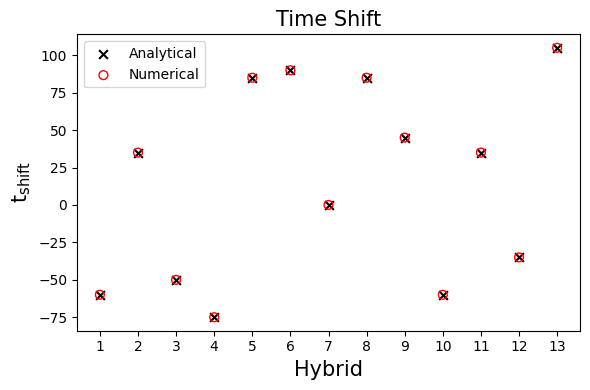

In [13]:
ID = np.arange(1,14,1)
print(ID)
plt.figure(figsize=(6,4))
plt.scatter(ID, tshift_Anly_fit, marker="x", color = 'black',s=40, label='Analytical')
plt.scatter(ID, tshift_Vec, marker = 'o', facecolor ='none',edgecolor='red',s=40, label='Numerical' )
plt.xticks(ID)
plt.xlabel('Hybrid',fontsize=15)
plt.ylabel(r't$_{\rm shift}$',fontsize=15)
plt.title('Time Shift',fontsize=15)
plt.legend()
plt.tight_layout()
#plt.savefig('Anly_fit_tshift.pdf',dpi=300)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


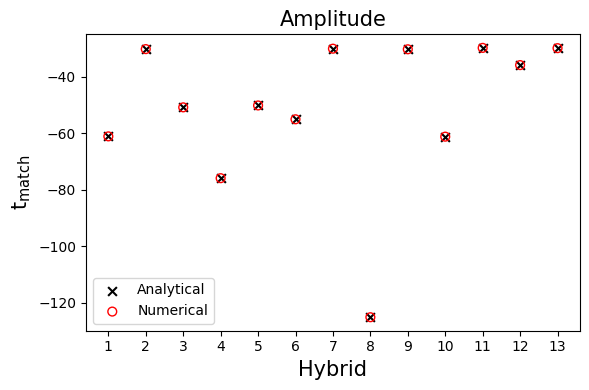

In [14]:
ID = np.arange(1,14,1)
print(ID)
plt.figure(figsize=(6,4))
plt.scatter(ID, tamp_Anly_fit, marker="x", color = 'black',s=40, label='Analytical')
plt.scatter(ID, tmatch_amp_Vec, marker = 'o', facecolor ='none',edgecolor='red',s=40, label='Numerical' )
plt.xticks(ID)
plt.xlabel('Hybrid',fontsize=15)
plt.ylabel(r't$_{\rm match}$',fontsize=15)
plt.title('Amplitude',fontsize=15)
plt.legend()
plt.tight_layout()
#plt.savefig('Anly_fit_amp.pdf',dpi=300)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


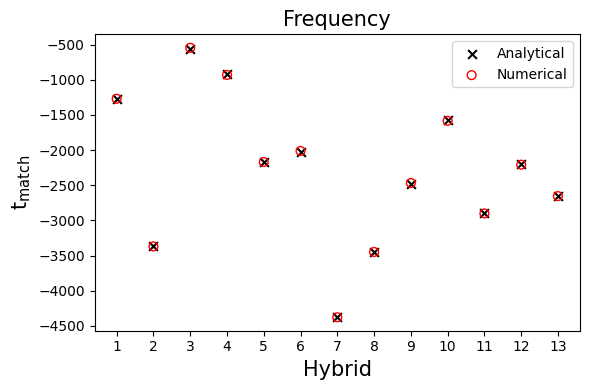

In [15]:
ID = np.arange(1,14,1)
print(ID)
plt.figure(figsize=(6,4))
plt.scatter(ID, tfreq_Anly_fit, marker="x", color = 'black',s=40,label='Analytical')
plt.scatter(ID, tmatch_freq_Vec, marker = 'o', facecolor ='none',edgecolor='red',s=40,label='Numerical' )
plt.xticks(ID)
plt.xlabel('Hybrid',fontsize=15)
plt.ylabel(r't$_{\rm match}$',fontsize=15)
plt.title('Frequency',fontsize=15)
plt.tight_layout()
plt.legend()
#plt.savefig('Anly_fit_freq.pdf',dpi=300)